In [1]:
# -*- coding: utf-8 -*-
# author: Jess Garriga

# Práctica para el curso "Adquisición, Gestión y Análisis de Datos a Gran escala - Big Data"

El siguiente notebook presenta una aplicación de Ciencia de Datos aplicada a la Business Intelligence para analizar las ventas de una empresa ficticia, creada a los fines del ejercicio. Analizamos 5000 datarows de ventas.

**Conocimientos previos**:

- Estadísticas (muy importante para las descripciones que realizaremos)
- Ciencia de datos
- Python
- Jupyter lab
- Business Intelligence

**Objetivos**:

- Cargar datos normalizados en múltiples tablas para crear un cubo multidimensional
- Definir medidas agregadas para proporcionar información específica de la aplicación y de alto nivel
- Simular distintos escenarios económicos
- Construir gráficos y tablas interactivas low code
- Crear un dashboard (cuadro de mando o tablero) accesible para la toma de decisiones

## Datos y librerías

In [2]:
import atoti as tt

# Opcionalmente desactivo la recopilación de datos de atoti y el mensaje inicial
ATOTI_HIDE_EULA_MESSAGE = True
ATOTI_DISABLE_TELEMETRY = True

# creo el objeto "session"
session = tt.Session()

Welcome to atoti 0.7.0!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


Cargamos los datos del .csv en una tabla llamada _tabla_ventas_:

In [3]:
tabla_ventas = session.read_csv("data/ventas.csv", keys=["ID-venta"]) 
# el método "read_csv" viene heredado de Pandas

Veremos los datos cargados. Las ventas de la empresa son:

In [4]:
tabla_ventas.head()

,Fecha,Negocio,Producto,Cantidad,Precio-unitario
ID-venta,,,,,
S000000002,2021-02-02,negocio_2,CHA_2,2.0,60.0
S000000004,2021-01-31,negocio_4,BED_4,3.0,300.0
S000000006,2021-01-29,negocio_6,BED_6,2.0,440.0
S000000008,2021-01-27,negocio_8,TSH_8,1.0,20.0
S000000026,2021-01-09,negocio_26,BED_26,1.0,395.0


Ahora vamos a usar la tabla para crear un cubo:

In [5]:
cubo = session.create_cube(tabla_ventas)

### Conceptos multidimensionales

In [6]:
jerarquias = cubo.hierarchies
jerarquias

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Ventas', _hierarchies=..., _measures=Measures())>, _cube_name='Ventas')

El cubo ha creado automáticamente una jerarquía para cada columna no numérica:

- Fecha, 
- Producto, 
- ID-venta, 
- Negocio.

In [7]:
niveles = cubo.levels

Estas son las medidas del cubo que se han deducido de los datos:

In [8]:
medidas = cubo.measures
medidas

Measures()

In [9]:
cubo.query(medidas["Cantidad.SUM"])

,Cantidad.SUM
0,"8,077.00"


In [10]:
cubo.query(medidas["Cantidad.SUM"], levels=[niveles["Negocio"]])

,Cantidad.SUM
Negocio,
negocio_0,202.00
negocio_1,202.00
negocio_10,203.00
negocio_11,203.00
negocio_12,201.00
negocio_13,202.00
negocio_14,202.00
negocio_15,202.00
negocio_16,201.00


In [11]:
cubo.query(
    medidas["Cantidad.SUM"],
    filter=niveles["Negocio"] == "negocio_0",
)

,Cantidad.SUM
0,202.00


In [12]:
cubo.query(medidas["Cantidad.SUM"], levels=[niveles["Fecha"], niveles["Producto"]])

Cantidad.SUM
Fecha      Producto             
2021-01-06 BED_24           8.00
           BED_25           4.00
           BED_26           6.00
           BED_27           4.00
           BED_3            2.00
...                          ...
2021-02-04 TSH_52           6.00
           TSH_53           4.00
           TSH_7            3.00
           TSH_8            5.00
           TSH_9            3.00

[1830 rows x 1 columns]

In [13]:
cubo.query(
    medidas["Cantidad.SUM"],
    levels=[niveles["Fecha"], niveles["Producto"]],
    filter=niveles["Negocio"] == "negocio_0",
)

Cantidad.SUM
Fecha      Producto             
2021-01-15 BED_24           1.00
           BED_26           1.00
           BED_3            1.00
           BED_4            1.00
           BED_46           1.00
...                          ...
2021-02-04 TSH_51           2.00
           TSH_52           1.00
           TSH_53           1.00
           TSH_7            1.00
           TSH_9            1.00

[125 rows x 1 columns]

### Primera visualización

In [14]:
session.visualize("Cantidad por producto")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [15]:
session.visualize("Cantidad por fecha")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Desglose y filtros

In [16]:
session.visualize("Cantidad por fecha filtrando productos en negocio_19")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [17]:
session.visualize("Cantidad de productos por fecha")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Aplicación de dashboard (cuadro de mando o tablero)

In [18]:
session.link()

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

## Enriquecer el cubo

### Unir *("Join")*

#### Tablas relacionales

In [19]:
tabla_productos = session.read_csv("data/productos.csv", keys=["Producto"])

In [20]:
tabla_productos.head()

,Categoria,Subcategoria,Talla,Precio-de-compra,Color,Marca
Producto,,,,,,
CHA_2,Muebles,Silla,N/A,48.0,azul,Basic
BED_6,Muebles,Cama,King,375.0,blanco,Basic
TSH_10,Ropa,Remera,L,20.0,negro,Over
HOO_14,Ropa,Buzo,L,39.0,marron,Over
SHO_18,Ropa,Zapatillas,10,46.0,rojo,Over


In [21]:
tabla_ventas.join(tabla_productos, mapping={"Producto": "Producto"})

Podemos visualizar la estructura de las tablas de la sesión:

In [22]:
session.tables

{'Productos': Table(_name='Productos', _scenario='Base', _columns={'Producto': Column(_name='Producto', _table_keys=['Producto'], _table_name='Productos', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Categoria': Column(_name='Categoria', _table_keys=['Producto'], _table_name='Productos', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Subcategoria': Column(_name='Subcategoria', _table_keys=['Producto'], _table_name='Productos', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Talla': Column(_name='Talla', _table_keys=['Producto'], _table_name='Productos', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Precio-de-compra': Column(_name='Precio-de-compra', _table_keys=['Producto'], _table_name='Productos', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Color': Column(_name='Color', _table_keys=['Producto'], _table_name='Productos', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Marca': Column(_name='Marca', _table_keys=['Producto'], _table_name='Productos', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>)}), 'Ventas': Table(_name='Ventas', _scenario='Base', _columns={'ID-venta': Column(_name='ID-venta', _table_keys=['ID-venta'], _table_name='Ventas', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Fecha': Column(_name='Fecha', _table_keys=['ID-venta'], _table_name='Ventas', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Negocio': Column(_name='Negocio', _table_keys=['ID-venta'], _table_name='Ventas', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Producto': Column(_name='Producto', _table_keys=['ID-venta'], _table_name='Ventas', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Cantidad': Column(_name='Cantidad', _table_keys=['ID-venta'], _table_name='Ventas', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>), 'Precio-unitario': Column(_name='Precio-unitario', _table_keys=['ID-venta'], _table_name='Ventas', _get_column_data_type=<bound method JavaApi.get_column_data_type of <atoti._java_api.JavaApi object at 0x7fcf17bad3d0>>)})}

**IMPORTANTE**: Para este paso necesitamos tener instalado [Graphviz](https://www.graphviz.org).

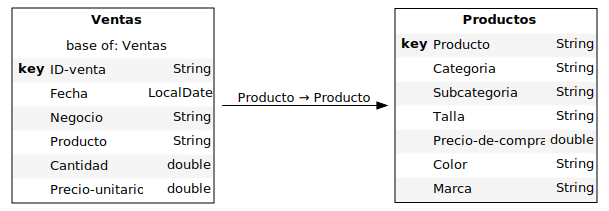

In [23]:
session.tables.schema
# para ver la distinción entre float y double ver https://hackr.io/blog/float-vs-double

Las nuevas columnas se han añadido automáticamente al cubo como jerarquías, en una dimensión con el mismo nombre que la nueva tabla:

In [24]:
jerarquias

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Ventas', _hierarchies=..., _measures=Measures())>, _cube_name='Ventas')

In [25]:
session.visualize("Precio medio por subcategoría de producto")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [26]:
session.visualize("Ventas por tipo de marca")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [27]:
medidas["Precio-de-compra.VALUE"] = tt.agg.single_value(tabla_productos["Precio-de-compra"])

In [28]:
cubo.query(medidas["Precio-de-compra.VALUE"], levels=[niveles["Producto"]])

,Precio-de-compra.VALUE
Producto,
BED_24,127.00
BED_25,252.00
BED_26,333.00
BED_27,375.00
BED_3,127.00
...,...
TSH_52,20.00
TSH_53,21.00
TSH_7,17.00


In [29]:
tabla_negocios = session.read_csv("data/negocios.csv", keys=["ID-negocio"])
tabla_negocios.head()

,Ciudad,Region,Pais,Tamanio-de-la-tienda
ID-negocio,,,,
negocio_2,San Diego,California,USA,mediano
negocio_6,San Antonio,Texas,USA,pequenio
negocio_10,Nice,Provence-Alpes-Cote d'Azur,Francia,mediano
negocio_14,Los Angeles,California,USA,pequenio
negocio_18,Houston,Texas,USA,grande


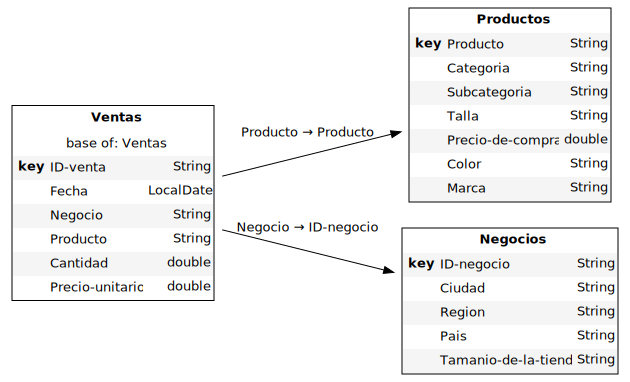

In [30]:
tabla_ventas.join(tabla_negocios, mapping={"Negocio": "ID-negocio"})
session.tables.schema

### Nuevas medidas

#### Precios máximos

In [31]:
medidas["Precio máximo"] = tt.agg.max(tabla_ventas["Precio-unitario"])

In [32]:
cubo.query(medidas["Precio máximo"], include_totals=True, levels=[niveles["Categoria"]])

,Precio máximo
Categoria,
Total,440.00
Muebles,440.00
Ropa,60.00


#### Operaciones a nivel de hechos

In [33]:
medidas["Importe.SUM"] = tt.agg.sum(tabla_ventas["Cantidad"] * tabla_ventas["Precio-unitario"])
medidas["Importe.MEAN"] = tt.agg.mean(
    tabla_ventas["Cantidad"] * tabla_ventas["Precio-unitario"],
)

In [34]:
session.visualize("Evolución de las ventas por país a lo largo del tiempo")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Margen

In [35]:
costo = tt.agg.sum(
    medidas["Cantidad.SUM"] * tt.agg.single_value(tabla_productos["Precio-de-compra"]),
    scope=tt.OriginScope(niveles["Producto"]),
)

In [36]:
medidas["Margen"] = medidas["Importe.SUM"] - costo

In [37]:
medidas["Tasa de margen"] = medidas["Margen"] / medidas["Importe.SUM"]

In [38]:
cubo.query(medidas["Margen"], medidas["Tasa de margen"], levels=[niveles["Producto"]])

,Margen,Tasa de margen
Producto,,
BED_24,"3,082.00",.15
BED_25,"6,336.00",.16
BED_26,"8,060.00",.16
BED_27,"8,580.00",.15
BED_3,"3,036.00",.15
...,...,...
TSH_52,520.00,.17
TSH_53,396.00,.12
TSH_7,393.00,.15


El margen de beneficio lo definimos como un porcentaje del precio que está por encima del coste. Nuestros productos nos dan un margen superior al 10%.

```Tasa de margen (de beneficio) = (Precio - Costo) / Precio```

Utilicemos esta tasa de margen para hacer un filtro **Top 10 productos con mejor tasa**.

In [39]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Suma acumulada en el tiempo

In [40]:
medidas["Suma acumulada"] = tt.agg.sum(
    medidas["Importe.SUM"], scope=tt.CumulativeScope(level=niveles["Fecha"])
)

In [41]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Promedio por negocio

In [42]:
medidas["Promedio por negocio"] = tt.agg.mean(
    medidas["Importe.SUM"], scope=tt.OriginScope(niveles["Negocio"])
)

In [43]:
cubo.query(
    medidas["Promedio por negocio"], include_totals=True, levels=[niveles["Subcategoria"]]
)

,Promedio por negocio
Subcategoria,
Total,"24,036.58"
Buzo,"1,403.20"
Cama,"12,728.88"
Mesa,"5,023.50"
Remera,"1,095.00"
Silla,601.50
Zapatillas,"3,184.50"


## Simulaciones

### Simulación de Origen

In [44]:
import pandas as pd

Podemos simular qué pasaría si hubiéramos conseguido comprar algunos productos a un precio más barato.

In [45]:
productos_df = pd.read_csv("data/productos.csv")
productos_df.head()

,Producto,Categoria,Subcategoria,Talla,Precio-de-compra,Color,Marca
0,TAB_0,Muebles,Mesa,1m80,190.0,negro,Basic
1,TAB_1,Muebles,Mesa,2m40,280.0,blanco,Mega
2,CHA_2,Muebles,Silla,NaN,48.0,azul,Basic
3,BED_3,Muebles,Cama,Single,127.0,rojo,Mega
4,BED_4,Muebles,Cama,Double,252.0,marron,Basic


In [46]:
mejores_precios = {
    "TAB_0": 180.0,
    "TAB_1": 250.0,
    "CHA_2": 40.0,
    "BED_3": 110.0,
    "BED_4": 210.0,
}

In [47]:
for producto, precio_de_compra in mejores_precios.items():
    productos_df.loc[
        productos_df["Producto"] == producto, "Precio-de-compra"
    ] = precio_de_compra
productos_df.head()

,Producto,Categoria,Subcategoria,Talla,Precio-de-compra,Color,Marca
0,TAB_0,Muebles,Mesa,1m80,180.0,negro,Basic
1,TAB_1,Muebles,Mesa,2m40,250.0,blanco,Mega
2,CHA_2,Muebles,Silla,NaN,40.0,azul,Basic
3,BED_3,Muebles,Cama,Single,110.0,rojo,Mega
4,BED_4,Muebles,Cama,Double,210.0,marron,Basic


Ahora podemos cargar este nuevo marco de datos en un nuevo escenario de la tabla de productos.

In [48]:
tabla_productos.scenarios["Precio de compra más barato"].load_pandas(productos_df)

In [49]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [50]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Simulaciones de parámetros

Al crear la simulación, se puede elegir a qué granularidad se aplica la modificación. Por ejemplo, podemos crear una medida de parámetro cuyo valor cambie en función del país. Haciendo esto, podemos responder a preguntas como "¿Qué pasa si hay una crisis en Francia y vendemos un 20% menos?"

In [51]:
simulacion_pais = cubo.create_parameter_simulation(
    "Simulación país",
    levels=[niveles["Pais"]],
    measures={"Parametro País": 1.0},
)

In [52]:
simulacion_pais += ("Crisis en Francia", "Francia", 0.80)
simulacion_pais.head()

,,Parametro País
Scenario,Pais,
Crisis en Francia,Francia,0.8


In [53]:
medidas["Cantidad.SUM"] = tt.agg.sum(
    tt.agg.sum(tabla_ventas["Cantidad"]) * medidas["Parametro País"],
    scope=tt.OriginScope(niveles["Pais"]),
)
medidas["Importe.SUM"] = tt.agg.sum(
    tt.agg.sum(tabla_ventas["Precio-unitario"] * tabla_ventas["Cantidad"])
    * medidas["Parametro País"],
    scope=tt.OriginScope(niveles["Pais"]),
)

In [54]:
cubo.query(
    medidas["Cantidad.SUM"],
    medidas["Importe.SUM"],
    include_totals=True,
    levels=[niveles["Simulación país"], niveles["Pais"]],
)

Cantidad.SUM Importe.SUM
Simulación país   Pais                            
Base                          8,077.00  961,463.00
                  Francia     3,027.00  358,042.00
                  USA         5,050.00  603,421.00
Crisis en Francia             7,471.60  889,854.60
                  Francia     2,421.60  286,433.60
                  USA         5,050.00  603,421.00

In [55]:
cubo.query(medidas["Suma acumulada"], levels=[niveles["Simulación país"], niveles["Pais"]])

Suma acumulada
Simulación país   Pais                  
Base              Francia     358,042.00
                  USA         603,421.00
Crisis en Francia Francia     286,433.60
                  USA         603,421.00

In [56]:
simulacion_pais += ("Mejora en USA", "USA", 1.15)

In [57]:
cubo.query(medidas["Cantidad.SUM"], levels=[niveles["Simulación país"], niveles["Pais"]])

Cantidad.SUM
Simulación país   Pais                
Base              Francia     3,027.00
                  USA         5,050.00
Crisis en Francia Francia     2,421.60
                  USA         5,050.00
Mejora en USA     Francia     3,027.00
                  USA         5,807.50

In [ ]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.